<a href="https://colab.research.google.com/github/TiffanyNgai/MNIST_dnn/blob/main/MNIST_DNN_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
import numpy as np
import tensorflow as tf
import math
from tensorflow import keras
from keras.datasets import mnist
from matplotlib import pyplot

## Load data

In [ ]:
(train_X, train_Y), (dev_X, dev_Y) = mnist.load_data()

In [ ]:
print(f"train_X: {train_X.shape}")
print(f"train_Y: {train_Y.shape}")
print(f"dev_X: {dev_X.shape}")
print(f"dev_Y: {dev_Y.shape}")

train_X: (60000, 28, 28)
train_Y: (60000,)
dev_X: (10000, 28, 28)
dev_Y: (10000,)


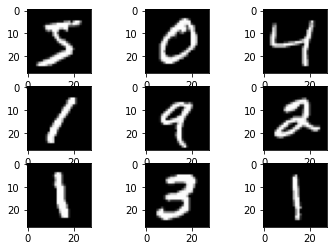

In [ ]:
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

## Data preprocessing

In [ ]:
num_train = train_X.shape[0]
num_dev = dev_X.shape[0]
img_dim = train_X.shape[1]

norm_flat_train_X = train_X.reshape(num_train, img_dim * img_dim).astype('float32') / 255.0
norm_flat_dev_X = dev_X.reshape(num_dev, img_dim * img_dim).astype('float32') / 255.0

one_hot_train_Y = np.zeros((num_train, 10))
for i in range(num_train):
  one_hot_train_Y[i, train_Y[i]] = 1.0

one_hot_dev_Y = np.zeros((num_dev, 10))
for i in range(num_dev):
  one_hot_dev_Y[i, dev_Y[i]] = 1.0

print(f"norm_flat_train_X: {norm_flat_train_X.shape}")
print(f"one_hot_train_Y: {one_hot_train_Y.shape}")
print(f"norm_flat_dev_X: {norm_flat_dev_X.shape}")
print(f"one_hot_dev_Y: {one_hot_dev_Y.shape}")

norm_flat_train_X: (60000, 784)
one_hot_train_Y: (60000, 10)
norm_flat_dev_X: (10000, 784)
one_hot_dev_Y: (10000, 10)


## Build model
Model architecture:
- input layer: 28 * 28 = 784 nodes
- hidden layer 1: 256 nodes
- hidden layer 2: 128 nodes
- output layer: 10 nodes

Process:
- Feedforward -> ReLU -> Feedforward -> ReLU -> Feedforward -> sigmoid

In [ ]:
layer_dims = [784, 256, 128, 10]
learning_rate = 0.01

## Train model

In [ ]:
grads = {}
costs = []
accuracies = []
iter_num = 500
mod = 10

#Initialize parameters
parameters = {}
L = len(layer_dims)

for l in range(1, L):
  parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) - 0.05
  parameters['b' + str(l)] = np.random.randn(layer_dims[l], 1) - 0.05

for i in range(0, iter_num):
  #Feedforward
  Z1 = np.dot(parameters['W1'], norm_flat_train_X.T) + parameters['b1']
  A1 = np.maximum(Z1, 0) #ReLU
  Z2 = np.dot(parameters['W2'], A1) + parameters['b2']
  A2 = np.maximum(Z2, 0) #ReLU
  Z3 = np.dot(parameters['W3'], A2) + parameters['b3']
  A3 = 1 / (1 + np.exp(-Z3)) #Sigmoid

  #Calculate derivatives
  dZ3 = A3 - one_hot_train_Y.T
  grads['dW3'] = 1/num_train * np.dot(dZ3, A2.T)
  grads['db3'] = 1/num_train * np.sum(dZ3, axis=1, keepdims=True)
  dZ2 = np.multiply(np.dot(parameters['W3'].T, dZ3), Z2 > 0)
  grads['dW2'] = 1/num_train * np.dot(dZ2, A1.T)
  grads['db2'] = 1/num_train * np.sum(dZ2, axis=1, keepdims=True)
  dZ1 = np.multiply(np.dot(parameters['W2'].T, dZ2), Z1 > 0)
  grads['dW1'] = 1/num_train * np.dot(dZ1, norm_flat_train_X)
  grads['db1'] = 1/num_train * np.sum(dZ1, axis=1, keepdims=True)

  #Backprop
  for l in range(1, L):
    parameters['W' + str(l)] = parameters['W' + str(l)] - learning_rate * grads['dW' + str(l)]
    parameters['b' + str(l)] = parameters['b' + str(l)] - learning_rate * grads['db' + str(l)]
  
  if i % mod == 0:
    #Train set feedforward
    Z1 = np.dot(parameters['W1'], norm_flat_train_X.T) + parameters['b1']
    A1 = np.maximum(Z1, 0) #ReLU
    Z2 = np.dot(parameters['W2'], A1) + parameters['b2']
    A2 = np.maximum(Z2, 0) #ReLU
    Z3 = np.dot(parameters['W3'], A2) + parameters['b3']
    A3 = 1 / (1 + np.exp(-Z3)) #Sigmoid

    # #Calculate cost
    # log_prob = np.multiply(one_hot_train_Y.T, np.log(A3)) + np.multiply((1-one_hot_train_Y.T), np.log(1-A3))
    # cost = -1/num_train * np.sum(log_prob)
    # cost = np.squeeze(cost)
    # costs.append(cost)
    # print(f"{i}th iteration, cost: {cost}")

    #Calculate dev set accuracy
    predicted_train_Y = np.argmax(A3, axis=0)
    accuracy = np.sum(predicted_train_Y == train_Y) / num_train
    accuracies.append(accuracy)
    print(f"{i}th iteration, train accuracy: {accuracy}")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in exp


0th iteration, train accuracy: 0.11951666666666666
10th iteration, train accuracy: 0.36625
20th iteration, train accuracy: 0.5036666666666667
30th iteration, train accuracy: 0.5709166666666666
40th iteration, train accuracy: 0.6138833333333333
50th iteration, train accuracy: 0.6443166666666666
60th iteration, train accuracy: 0.6667166666666666
70th iteration, train accuracy: 0.6840833333333334
80th iteration, train accuracy: 0.6993166666666667
90th iteration, train accuracy: 0.7104166666666667
100th iteration, train accuracy: 0.7208166666666667
110th iteration, train accuracy: 0.7288
120th iteration, train accuracy: 0.7370166666666667
130th iteration, train accuracy: 0.74335
140th iteration, train accuracy: 0.7503666666666666
150th iteration, train accuracy: 0.75495
160th iteration, train accuracy: 0.7595666666666666
170th iteration, train accuracy: 0.7643666666666666
180th iteration, train accuracy: 0.7682166666666667
190th iteration, train accuracy: 0.7713166666666667
200th iteration

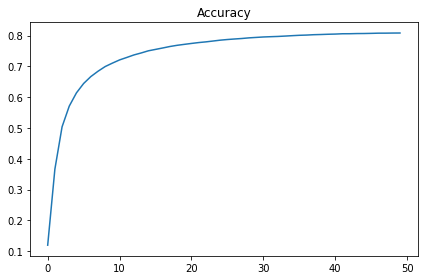

In [ ]:
x_val = range(int(iter_num / mod))
# pyplot.subplot(1, 2, 1)
# pyplot.plot(x_val, costs)
# pyplot.title("Cost")
# pyplot.subplot(1, 2, 2)
pyplot.plot(x_val, accuracies)
pyplot.title("Accuracy")
pyplot.tight_layout()
pyplot.show()

## Evaluate model

In [ ]:
#Train set feedforward
Z1 = np.dot(parameters['W1'], norm_flat_train_X.T) + parameters['b1']
A1 = np.maximum(Z1, 0) #ReLU
Z2 = np.dot(parameters['W2'], A1) + parameters['b2']
A2 = np.maximum(Z2, 0) #ReLU
Z3 = np.dot(parameters['W3'], A2) + parameters['b3']
A3 = 1 / (1 + np.exp(-Z3))
predicted_train_Y = np.argmax(A3, axis=0)
accuracy = np.sum(predicted_train_Y == train_Y) / num_train
print(f"Train accuracy: {accuracy}")
print(f"train_Y: {train_Y}")
print(f"predicted_train_Y: {predicted_train_Y}")

#Dev set feedforward
Z1 = np.dot(parameters['W1'], norm_flat_dev_X.T) + parameters['b1']
A1 = np.maximum(Z1, 0) #ReLU
Z2 = np.dot(parameters['W2'], A1) + parameters['b2']
A2 = np.maximum(Z2, 0) #ReLU
Z3 = np.dot(parameters['W3'], A2) + parameters['b3']
A3 = 1 / (1 + np.exp(-Z3))
predicted_dev_Y = np.argmax(A3, axis=0)
accuracy = np.sum(predicted_dev_Y == dev_Y) / num_dev
print(f"Dev accuracy: {accuracy}")
print(f"dev_Y: {dev_Y}")
print(f"predicted_dev_Y: {predicted_dev_Y}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


Train accuracy: 0.8084
train_Y: [5 0 4 ... 5 6 8]
predicted_train_Y: [5 0 4 ... 5 6 8]
Dev accuracy: 0.8117
dev_Y: [7 2 1 ... 4 5 6]
predicted_dev_Y: [7 2 1 ... 4 5 6]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


## Minibatch

In [41]:
#Make minibatches
batch_size = 256
complete_minibatch = math.floor(num_train / batch_size)
extra = 0
if num_train % batch_size != 0:
  extra = 1

mini_batch_X = np.empty([complete_minibatch+1, img_dim*img_dim, batch_size])
mini_batch_Y = np.empty([complete_minibatch+1, 10, batch_size])

for i in range(0, complete_minibatch):
  mini_batch_X[i] = norm_flat_train_X.T[:, (i*batch_size):((i+1)*batch_size)]
  mini_batch_Y[i] = one_hot_train_Y.T[:, (i*batch_size):((i+1)*batch_size)]

remaining = 0
if extra:
  for r in range((complete_minibatch*batch_size), num_train):
    mini_batch_X[complete_minibatch, :, remaining] = norm_flat_train_X.T[:, r]
    mini_batch_Y[complete_minibatch, :, remaining] = one_hot_train_Y.T[:, r]
    remaining += 1


print(f"Mini batch X: {mini_batch_X.shape}")
print(f"Mini batch Y: {mini_batch_Y.shape}")

Mini batch X: (235, 784, 256)
Mini batch Y: (235, 10, 256)


In [42]:
# Minibatch gradient descent
grads = {}
costs = []
accuracies = []
iter_num = 500
mod = 10

#Initialize parameters
parameters = {}
L = len(layer_dims)

for l in range(1, L):
  parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) - 0.05
  parameters['b' + str(l)] = np.random.randn(layer_dims[l], 1) - 0.05

for i in range(0, iter_num):
  for batch in range(complete_minibatch):
    #Feedforward
    Z1 = np.dot(parameters['W1'], mini_batch_X[batch]) + parameters['b1']
    A1 = np.maximum(Z1, 0) #ReLU
    Z2 = np.dot(parameters['W2'], A1) + parameters['b2']
    A2 = np.maximum(Z2, 0) #ReLU
    Z3 = np.dot(parameters['W3'], A2) + parameters['b3']
    A3 = 1 / (1 + np.exp(-Z3)) #Sigmoid

    #Calculate derivatives
    dZ3 = A3 - mini_batch_Y[batch]
    grads['dW3'] = 1/num_train * np.dot(dZ3, A2.T)
    grads['db3'] = 1/num_train * np.sum(dZ3, axis=1, keepdims=True)
    dZ2 = np.multiply(np.dot(parameters['W3'].T, dZ3), Z2 > 0)
    grads['dW2'] = 1/num_train * np.dot(dZ2, A1.T)
    grads['db2'] = 1/num_train * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(parameters['W2'].T, dZ2), Z1 > 0)
    grads['dW1'] = 1/num_train * np.dot(dZ1, mini_batch_X[batch].T)
    grads['db1'] = 1/num_train * np.sum(dZ1, axis=1, keepdims=True)

    #Backprop
    for l in range(1, L):
      parameters['W' + str(l)] = parameters['W' + str(l)] - learning_rate * grads['dW' + str(l)]
      parameters['b' + str(l)] = parameters['b' + str(l)] - learning_rate * grads['db' + str(l)]
  
  #Last batch
  if extra: 
    #Feedforward
    Z1 = np.dot(parameters['W1'], mini_batch_X[complete_minibatch, :, 0:remaining]) + parameters['b1']
    A1 = np.maximum(Z1, 0) #ReLU
    Z2 = np.dot(parameters['W2'], A1) + parameters['b2']
    A2 = np.maximum(Z2, 0) #ReLU
    Z3 = np.dot(parameters['W3'], A2) + parameters['b3']
    A3 = 1 / (1 + np.exp(-Z3)) #Sigmoid

    #Calculate derivatives
    dZ3 = A3 - mini_batch_Y[complete_minibatch, :, 0:remaining]
    grads['dW3'] = 1/num_train * np.dot(dZ3, A2.T)
    grads['db3'] = 1/num_train * np.sum(dZ3, axis=1, keepdims=True)
    dZ2 = np.multiply(np.dot(parameters['W3'].T, dZ3), Z2 > 0)
    grads['dW2'] = 1/num_train * np.dot(dZ2, A1.T)
    grads['db2'] = 1/num_train * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(parameters['W2'].T, dZ2), Z1 > 0)
    grads['dW1'] = 1/num_train * np.dot(dZ1, mini_batch_X[complete_minibatch, :, 0:remaining].T)
    grads['db1'] = 1/num_train * np.sum(dZ1, axis=1, keepdims=True)

    #Backprop
    for l in range(1, L):
      parameters['W' + str(l)] = parameters['W' + str(l)] - learning_rate * grads['dW' + str(l)]
      parameters['b' + str(l)] = parameters['b' + str(l)] - learning_rate * grads['db' + str(l)]


  if i % mod == 0:
    #Train set feedforward
    Z1 = np.dot(parameters['W1'], norm_flat_train_X.T) + parameters['b1']
    A1 = np.maximum(Z1, 0) #ReLU
    Z2 = np.dot(parameters['W2'], A1) + parameters['b2']
    A2 = np.maximum(Z2, 0) #ReLU
    Z3 = np.dot(parameters['W3'], A2) + parameters['b3']
    A3 = 1 / (1 + np.exp(-Z3)) #Sigmoid

    # #Calculate cost
    # log_prob = np.multiply(one_hot_train_Y.T, np.log(A3)) + np.multiply((1-one_hot_train_Y.T), np.log(1-A3))
    # cost = -1/num_train * np.sum(log_prob)
    # cost = np.squeeze(cost)
    # costs.append(cost)
    # print(f"{i}th iteration, cost: {cost}")

    #Calculate dev set accuracy
    predicted_train_Y = np.argmax(A3, axis=0)
    accuracy = np.sum(predicted_train_Y == train_Y) / num_train
    accuracies.append(accuracy)
    print(f"{i}th iteration, train accuracy: {accuracy}")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: RuntimeWarning: overflow encountered in exp


0th iteration, train accuracy: 0.10653333333333333
10th iteration, train accuracy: 0.39593333333333336
20th iteration, train accuracy: 0.5206666666666667
30th iteration, train accuracy: 0.5855833333333333
40th iteration, train accuracy: 0.6284166666666666
50th iteration, train accuracy: 0.6576333333333333
60th iteration, train accuracy: 0.68125
70th iteration, train accuracy: 0.69825
80th iteration, train accuracy: 0.7127666666666667
90th iteration, train accuracy: 0.7241
100th iteration, train accuracy: 0.7336833333333334
110th iteration, train accuracy: 0.7419
120th iteration, train accuracy: 0.7487666666666667
130th iteration, train accuracy: 0.755
140th iteration, train accuracy: 0.7599833333333333
150th iteration, train accuracy: 0.7653666666666666
160th iteration, train accuracy: 0.7696
170th iteration, train accuracy: 0.7735833333333333
180th iteration, train accuracy: 0.7773666666666667
190th iteration, train accuracy: 0.7807
200th iteration, train accuracy: 0.7839666666666667


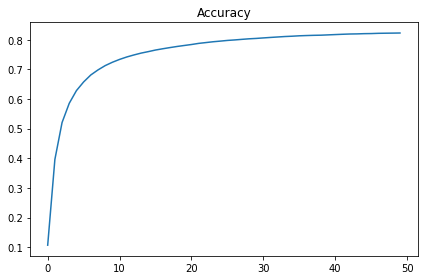

In [43]:
x_val = range(int(iter_num / mod))
# pyplot.subplot(1, 2, 1)
# pyplot.plot(x_val, costs)
# pyplot.title("Cost")
# pyplot.subplot(1, 2, 2)
pyplot.plot(x_val, accuracies)
pyplot.title("Accuracy")
pyplot.tight_layout()
pyplot.show()

## Minibatch - evaluate model

In [44]:
#Train set feedforward
Z1 = np.dot(parameters['W1'], norm_flat_train_X.T) + parameters['b1']
A1 = np.maximum(Z1, 0) #ReLU
Z2 = np.dot(parameters['W2'], A1) + parameters['b2']
A2 = np.maximum(Z2, 0) #ReLU
Z3 = np.dot(parameters['W3'], A2) + parameters['b3']
A3 = 1 / (1 + np.exp(-Z3))
predicted_train_Y = np.argmax(A3, axis=0)
accuracy = np.sum(predicted_train_Y == train_Y) / num_train
print(f"Train accuracy: {accuracy}")
print(f"train_Y: {train_Y}")
print(f"predicted_train_Y: {predicted_train_Y}")

#Dev set feedforward
Z1 = np.dot(parameters['W1'], norm_flat_dev_X.T) + parameters['b1']
A1 = np.maximum(Z1, 0) #ReLU
Z2 = np.dot(parameters['W2'], A1) + parameters['b2']
A2 = np.maximum(Z2, 0) #ReLU
Z3 = np.dot(parameters['W3'], A2) + parameters['b3']
A3 = 1 / (1 + np.exp(-Z3))
predicted_dev_Y = np.argmax(A3, axis=0)
accuracy = np.sum(predicted_dev_Y == dev_Y) / num_dev
print(f"Dev accuracy: {accuracy}")
print(f"dev_Y: {dev_Y}")
print(f"predicted_dev_Y: {predicted_dev_Y}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


Train accuracy: 0.82285
train_Y: [5 0 4 ... 5 6 8]
predicted_train_Y: [5 0 4 ... 5 6 8]
Dev accuracy: 0.8276
dev_Y: [7 2 1 ... 4 5 6]
predicted_dev_Y: [7 2 1 ... 4 5 6]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


## Inference

Inferring the 1341th sample.


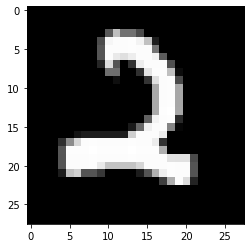

Actual output: 2
Predicted output: 2
Match! :)


In [57]:
#Pick a sample randomly
s = int(np.random.randint(0, num_dev - 1, 1))

#Visualize sample
print(f"Inferring the {s}th sample.")
pyplot.imshow(dev_X[s], cmap=pyplot.get_cmap('gray'))
pyplot.show()

#Feedforward
sample_X = norm_flat_dev_X[s].reshape((norm_flat_dev_X.shape[-1], 1))
Z1 = np.dot(parameters['W1'], sample_X) + parameters['b1']
A1 = np.maximum(Z1, 0) #ReLU
Z2 = np.dot(parameters['W2'], A1) + parameters['b2']
A2 = np.maximum(Z2, 0) #ReLU
Z3 = np.dot(parameters['W3'], A2) + parameters['b3']
A3 = 1 / (1 + np.exp(-Z3))
predicted_dev_Y = np.squeeze(np.argmax(A3, axis=0))

#Print result
match = predicted_dev_Y == dev_Y[s]
print(f"Actual output: {dev_Y[s]}")
print(f"Predicted output: {predicted_dev_Y}")

if match:
  print("Match! :)")
else:
  print("Mismatch :(")